<a href="https://colab.research.google.com/github/Mudit0110/Stress-Detection-System/blob/main/Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
Device set to use cuda:0



📌 Prediction: Stressed (1.00)


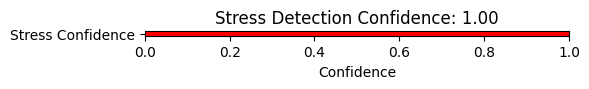

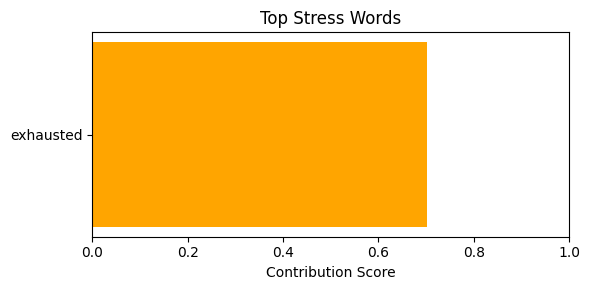

💡 Tip: Take short breaks, prioritize tasks, and seek help if needed.

📌 Prediction: Not Stressed (1.00)


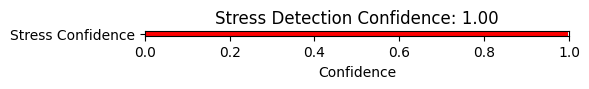


📌 Prediction: Not Stressed (1.00)


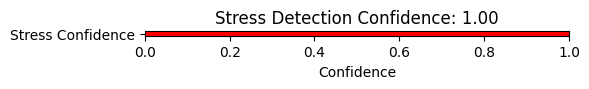


📌 Prediction: Stressed (1.00)


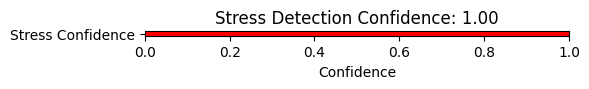

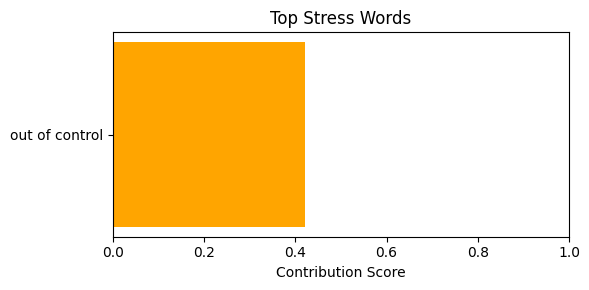

💡 Tip: Try taking a deep breath, going for a walk, or talking to someone you trust.

📌 Prediction: Not Stressed (1.00)


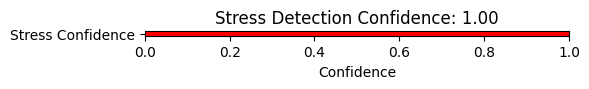


📌 Prediction: Stressed (1.00)


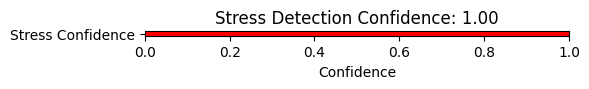

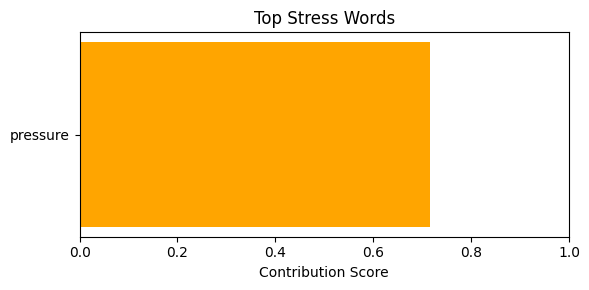

💡 Tip: Take short breaks, prioritize tasks, and seek help if needed.

📌 Prediction: Not Stressed (1.00)


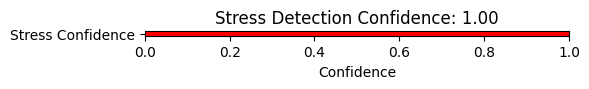


📌 Prediction: Not Stressed (1.00)


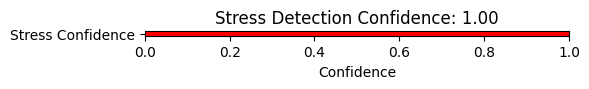


📌 Prediction: Stressed (1.00)


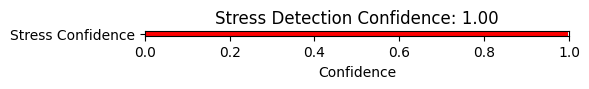

💡 Tip: Take short breaks, prioritize tasks, and seek help if needed.

📌 Prediction: Stressed (1.00)


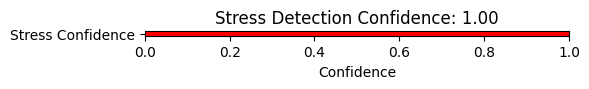

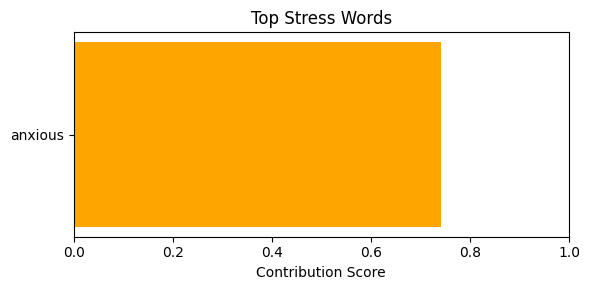

💡 Tip: Practice mindfulness, talk to a professional, or journal your feelings.


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

from nltk.corpus import wordnet as wn
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
import re
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML

# Model path
model_path = "/content/drive/MyDrive/stress_model_BERT"

# Load model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Create pipeline
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

# Sample texts
sample_texts = [
    "Deadlines are piling up, and I'm exhausted.",
    "I’m grateful for how things are going lately.",
    "Reading a good book always helps me relax.",
    "Everything feels overwhelming and out of control.",
    "Listening to music makes me feel centered and happy.",
    "I can't take this pressure anymore.",
    "I just got back from a calming walk in the park.",
    "I’ve been practicing mindfulness and it helps a lot.",
    "Why does everything have to go wrong at once?",
    "I feel anxious all the time and can't sleep properly."
]


stress_keywords = [
    # Emotional
    "worried", "anxious", "overwhelmed", "sad", "angry", "frustrated", "lonely", "hopeless", "helpless",
    "depressed", "fearful", "dread", "afraid", "panicked", "irritable", "guilt", "worthless",
    "self-doubt", "shame", "embarrassed", "unmotivated", "restless", "tension", "uncertain",

    # Mental
    "overthinking", "racing thoughts", "mind fog", "confused", "shaky", "hesitant", "unsettled",
    "distracted", "paranoid", "obsessed", "numb", "forgetful", "burnout", "mental block", "pressure",

    # Physical
    "tired", "fatigue", "exhausted", "insomnia", "difficulty sleeping", "loss of appetite",
    "tightness", "shallow breathing", "heart race", "suffocating", "sweating", "headache",
    "nausea", "dizzy", "clenched jaw", "muscle tension", "rapid heartbeat", "trembling", "fidgeting",

    # Behavioral
    "isolated", "withdrawn", "avoidant", "crying", "snapping", "procrastinating", "escaping",
    "substance abuse", "binging", "compulsive", "checking", "nail biting", "pacing", "zoning out",

    # Phrases
    "can't handle it", "on edge", "breaking down", "under pressure", "out of control",
    "losing it", "too much to bear", "always on alert", "nothing feels right", "no energy left"
]


recommendations = {
    "work": ["work", "pressure", "burnout", "deadline"],
    "relationships": ["lonely", "relationship", "argue", "fight", "partner", "divorce"],
    "mental_health": ["depressed", "sad", "helpless", "hopeless", "anxious", "panic"],
    "fatigue": ["tired", "exhausted", "burnout"],
    "fear": ["fear", "panic", "worry", "nervous"]
}

category_recommendations = {
    "work": "💡 Tip: Take short breaks, prioritize tasks, and seek help if needed.",
    "relationships": "💡 Tip: Talk openly with a trusted friend or partner, or consider counseling.",
    "mental_health": "💡 Tip: Practice mindfulness, talk to a professional, or journal your feelings.",
    "fatigue": "💡 Tip: Prioritize rest, eat well, and try to get enough sleep.",
    "fear": "💡 Tip: Try breathing exercises, and focus on things you can control."
}

def get_synonyms(word):
    synonyms = set()
    for syn in wn.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace('_', ' ').lower()
            if synonym != word:
                synonyms.add(synonym)
    return list(synonyms)

def expand_recommendations(original_dict):
    expanded_dict = {}
    for category, words in original_dict.items():
        expanded = set(words)
        for word in words:
            expanded.update(get_synonyms(word))
        expanded_dict[category] = list(expanded)
    return expanded_dict

expanded_recommendations = expand_recommendations(recommendations)

def detect_category_wordnet(text):
    text_lower = text.lower()
    for category, words in expanded_recommendations.items():
        for word in words:
            if word in text_lower:
                return category
    return None

# Visualization Functions

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def highlight_text(text, stress_keywords):
    tokens = nltk.word_tokenize(text.lower())
    highlighted = text
    for token in tokens:
        lemma = lemmatizer.lemmatize(token)
        for stress_word in stress_keywords:
            if stress_word in lemma:
                pattern = re.compile(rf'\b{token}\b', re.IGNORECASE)
                highlighted = pattern.sub(lambda m: f"**{m.group(0)}**", highlighted)
    return highlighted

def highlight_text_html(text, stress_keywords):
    tokens = nltk.word_tokenize(text.lower())
    highlighted = text
    for token in tokens:
        lemma = lemmatizer.lemmatize(token)
        for stress_word in stress_keywords:
            if stress_word in lemma:
                pattern = re.compile(rf'\b({re.escape(token)})\b', re.IGNORECASE)
                highlighted = pattern.sub(r'<mark>\1</mark>', highlighted)
    return highlighted


def show_confidence_gauge(score):
    fig, ax = plt.subplots(figsize=(6, 1))
    ax.barh(["Stress Confidence"], [score], color='red')
    ax.set_xlim(0, 1)
    ax.set_xlabel("Confidence")
    ax.set_title(f"Stress Detection Confidence: {score:.2f}")
    plt.tight_layout()
    plt.show()

def show_word_contribution_bar(text, keywords):
    # Simulated contribution: assign random values for illustration
    contribution_scores = []
    contributing_words = []
    for word in keywords:
        if re.search(r'\b{}\b'.format(re.escape(word)), text, re.IGNORECASE):
            contributing_words.append(word)
            contribution_scores.append(np.random.uniform(0.4, 1.0))  # random scores

    if contributing_words:
        fig, ax = plt.subplots(figsize=(6, 3))
        y_pos = np.arange(len(contributing_words))
        ax.barh(y_pos, contribution_scores, color='orange')
        ax.set_yticks(y_pos)
        ax.set_yticklabels(contributing_words)
        ax.set_xlim(0, 1)
        ax.set_xlabel("Contribution Score")
        ax.set_title("Top Stress Words")
        plt.tight_layout()
        plt.show()

# Main Loop
for text in sample_texts:
    result = classifier(text)[0]
    label = result['label']
    score = result['score']
    label_name = "Stressed" if label == "LABEL_1" else "Not Stressed"

    print(f"\n📌 Prediction: {label_name} ({score:.2f})")

    # 1️⃣ Display highlighted text
    highlighted_html = highlight_text_html(text, stress_keywords)
    display(HTML(f"<p>{highlighted_html}</p>"))

    # 2️⃣ Confidence meter
    show_confidence_gauge(score)

    # 3️⃣ Word contribution bar
    show_word_contribution_bar(text, stress_keywords)

    # 4️⃣ Recommendation
    if label_name == "Stressed":
        category = detect_category_wordnet(text)
        if category:
            tip = category_recommendations.get(category)
            if tip:
                print(tip)
        else:
            print("💡 Tip: Try taking a deep breath, going for a walk, or talking to someone you trust.")


In [ ]:
from nltk.corpus import wordnet as wn
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
import re
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Device set to use cuda:0



📌 Prediction: Stressed  (confidence=1.00)


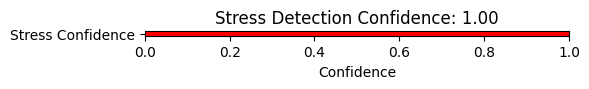

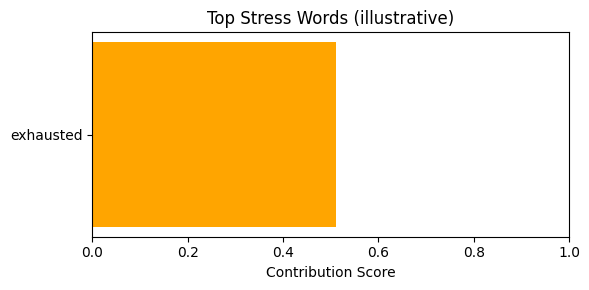

🔍 Detected category: work (similarity=0.73)
💡 Tip: Take short breaks, prioritize tasks, and ask for help when needed.

📌 Prediction: Not Stressed  (confidence=1.00)


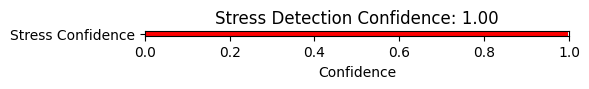


📌 Prediction: Not Stressed  (confidence=1.00)


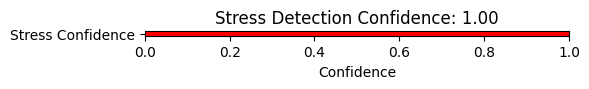


📌 Prediction: Stressed  (confidence=1.00)


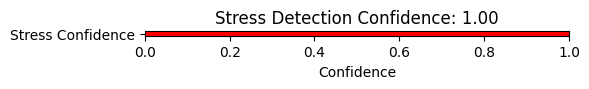

🔍 Detected category: mental_health (similarity=0.45)
💡 Tip: Practice mindfulness, journal feelings, or reach out to a mental‑health professional.

📌 Prediction: Not Stressed  (confidence=1.00)


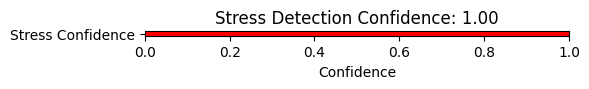


📌 Prediction: Stressed  (confidence=1.00)


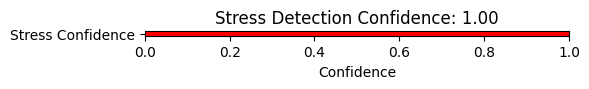

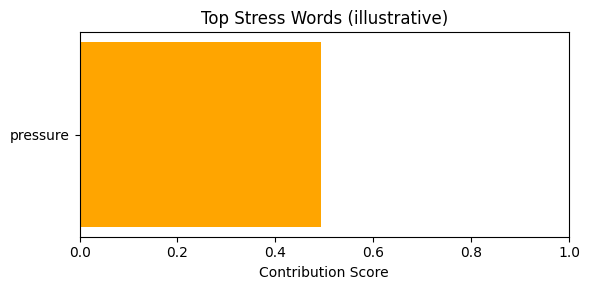

🔍 Detected category: fatigue (similarity=0.25)
💡 Tip: Schedule regular rest, eat balanced meals, and aim for consistent sleep.

📌 Prediction: Not Stressed  (confidence=1.00)


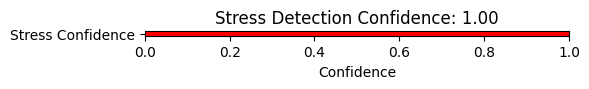


📌 Prediction: Not Stressed  (confidence=1.00)


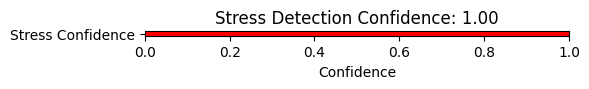


📌 Prediction: Stressed  (confidence=1.00)


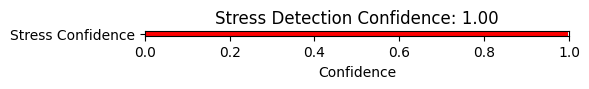

🔍 Detected category: mental_health (similarity=0.27)
💡 Tip: Practice mindfulness, journal feelings, or reach out to a mental‑health professional.

📌 Prediction: Stressed  (confidence=1.00)


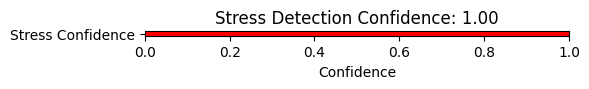

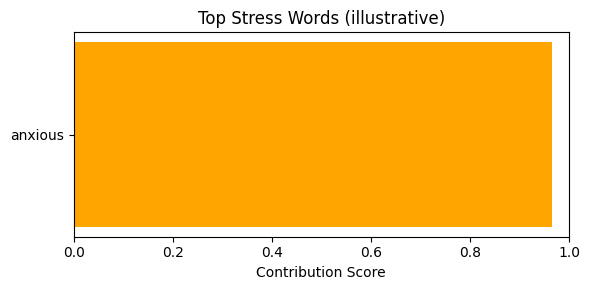

🔍 Detected category: mental_health (similarity=0.70)
💡 Tip: Practice mindfulness, journal feelings, or reach out to a mental‑health professional.


In [ ]:
# ─────────────────────────────────────────────
# 📦 1. Setup & installation  (Colab / local)
# ─────────────────────────────────────────────
# Uncomment the next line the first time you run
# !pip install -q sentence-transformers

import nltk, re, numpy as np, matplotlib.pyplot as plt
from IPython.display import display, HTML
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from sentence_transformers import SentenceTransformer, util
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (run once)
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("punkt")

# ─────────────────────────────────────────────
# 🏷️ 2. Load stress‑classification model
# ─────────────────────────────────────────────
model_path = "/content/drive/MyDrive/stress_model_BERT"   # ← adjust if needed
model      = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer  = AutoTokenizer.from_pretrained(model_path)
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

# ─────────────────────────────────────────────
# 🧠 3. Load sentence‑embedding model
# ─────────────────────────────────────────────
embedder = SentenceTransformer("all-MiniLM-L6-v2")

# 3a. Define category prototypes (one short phrase each) and their tips
category_prompts = {
    "work":           "I'm overwhelmed with office work and looming deadlines",
    "relationships":  "I'm having conflicts with my partner and feel lonely",
    "mental_health":  "I constantly feel anxious, hopeless, and depressed",
    "fatigue":        "I'm exhausted and lack energy to do anything",
    "fear":           "I'm scared and panicking about everything around me",
}
category_tips = {
    "work":          "💡 Tip: Take short breaks, prioritize tasks, and ask for help when needed.",
    "relationships": "💡 Tip: Talk openly with someone you trust or consider professional counseling.",
    "mental_health": "💡 Tip: Practice mindfulness, journal feelings, or reach out to a mental‑health professional.",
    "fatigue":       "💡 Tip: Schedule regular rest, eat balanced meals, and aim for consistent sleep.",
    "fear":          "💡 Tip: Use slow deep breaths and focus on what you can control right now.",
}
# Pre‑compute embeddings for prototypes
category_embeds = {k: embedder.encode(v, convert_to_tensor=True) for k, v in category_prompts.items()}

# ─────────────────────────────────────────────
# 🚀 4. Helper functions
# ─────────────────────────────────────────────
lemmatizer        = WordNetLemmatizer()
stress_keywords   = [
    # (same list you had, truncated here for brevity)
    "worried","anxious","overwhelmed","sad","angry","frustrated",
    "tired","fatigue","pressure","panic","deadline","exhausted",
    "can't handle it","on edge","breaking down",
]

def highlight_text_html(text: str, keywords) -> str:
    tokens = nltk.word_tokenize(text.lower())
    highlighted = text
    for tok in tokens:
        lemma = lemmatizer.lemmatize(tok)
        for kw in keywords:
            if kw in lemma:
                pattern = re.compile(rf'\b({re.escape(tok)})\b', re.IGNORECASE)
                highlighted = pattern.sub(r"<mark>\1</mark>", highlighted)
    return highlighted

def show_confidence_gauge(score: float):
    fig, ax = plt.subplots(figsize=(6, 1))
    ax.barh(["Stress Confidence"], [score], color="red")
    ax.set_xlim(0, 1)
    ax.set_xlabel("Confidence")
    ax.set_title(f"Stress Detection Confidence: {score:.2f}")
    plt.tight_layout()
    plt.show()

def show_word_contribution_bar(text: str, keywords):
    contrib_words, contrib_scores = [], []
    for kw in keywords:
        if re.search(rf"\b{re.escape(kw)}\b", text, re.IGNORECASE):
            contrib_words.append(kw)
            contrib_scores.append(np.random.uniform(0.4, 1.0))  # simulated scores
    if contrib_words:
        fig, ax = plt.subplots(figsize=(6, 3))
        y = np.arange(len(contrib_words))
        ax.barh(y, contrib_scores, color="orange")
        ax.set_yticks(y)
        ax.set_yticklabels(contrib_words)
        ax.set_xlim(0, 1)
        ax.set_xlabel("Contribution Score")
        ax.set_title("Top Stress Words (illustrative)")
        plt.tight_layout()
        plt.show()

def recommend_category(text: str):
    text_vec = embedder.encode(text, convert_to_tensor=True)
    best_cat, best_sim = None, -1
    for cat, vec in category_embeds.items():
        sim = util.pytorch_cos_sim(text_vec, vec).item()
        if sim > best_sim:
            best_cat, best_sim = cat, sim
    return best_cat, best_sim

# ─────────────────────────────────────────────
# 📝 5. Test on sample sentences
# ─────────────────────────────────────────────
sample_texts = [
    "Deadlines are piling up, and I'm exhausted.",
    "I’m grateful for how things are going lately.",
    "Reading a good book always helps me relax.",
    "Everything feels overwhelming and out of control.",
    "Listening to music makes me feel centered and happy.",
    "I can't take this pressure anymore.",
    "I just got back from a calming walk in the park.",
    "I’ve been practicing mindfulness and it helps a lot.",
    "Why does everything have to go wrong at once?",
    "I feel anxious all the time and can't sleep properly.",
]

for text in sample_texts:
    # 1. Run stress classifier
    pred   = classifier(text)[0]
    label  = "Stressed" if pred["label"] == "LABEL_1" else "Not Stressed"
    score  = pred["score"]

    print(f"\n📌 Prediction: {label}  (confidence={score:.2f})")

    # 2. Highlight stress words
    display(HTML(f"<p>{highlight_text_html(text, stress_keywords)}</p>"))

    # 3. Visualization
    show_confidence_gauge(score)
    show_word_contribution_bar(text, stress_keywords)

    # 4. Automatic Recommendation
    if label == "Stressed":
        cat, sim = recommend_category(text)
        tip = category_tips.get(cat, "💡 Tip: Try deep breathing, a walk, or talking to someone you trust.")
        print(f"🔍 Detected category: {cat} (similarity={sim:.2f})")
        print(tip)

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.corpus import wordnet as wn

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

# Path where you saved the model
model_path = "/content/drive/My Drive/stress_model_distil-BERT"

# Load model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Create pipeline
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

Device set to use cpu


In [ ]:
sample_texts = [
"Even though I achieved my goals today, there's this lingering tightness in my chest I can't shake.",
"I’ve been constantly thinking about whether I made the right choices in my career lately.",
"Laughed with friends tonight, but as soon as I got home, the silence felt suffocating.",
"Some days I feel like I’m just going through the motions, not really present.",
"I’ve started avoiding certain conversations because I know they’ll make my heart race."
]

In [ ]:
# Stress-related keywords for simple highlighting
stress_keywords = [
    "worried", "anxious", "overwhelmed", "sad", "tired", "stressed", "fear",
    "lonely", "depressed", "pressure", "cry", "panic", "exhausted", "insomnia"
]

# Function to highlight stress keywords
def highlight_text(text, keywords):
    highlighted = text
    for word in keywords:
        pattern = re.compile(r'\b{}\b'.format(re.escape(word)), re.IGNORECASE)
        highlighted = pattern.sub(lambda m: f"**{m.group(0)}**", highlighted)
    return highlighted

In [ ]:
recommendations = {
    "work": ["work", "pressure", "burnout", "deadline"],
    "relationships": ["lonely", "relationship", "argue", "fight", "partner", "divorce"],
    "mental_health": ["depressed", "sad", "helpless", "hopeless", "anxious", "panic"],
    "fatigue": ["tired", "exhausted", "burnout"],
    "fear": ["fear", "panic", "worry", "nervous"]
}

In [ ]:
category_recommendations = {
    "work": "💡 Tip: Take short breaks, prioritize tasks, and seek help if needed.",
    "relationships": "💡 Tip: Talk openly with a trusted friend or partner, or consider counseling.",
    "mental_health": "💡 Tip: Practice mindfulness, talk to a professional, or journal your feelings.",
    "fatigue": "💡 Tip: Prioritize rest, eat well, and try to get enough sleep.",
    "fear": "💡 Tip: Try breathing exercises, and focus on things you can control."
}

In [ ]:
def get_synonyms(word):
    synonyms = set()
    for syn in wn.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace('_', ' ').lower()
            if synonym != word:
                synonyms.add(synonym)
    return list(synonyms)

def expand_recommendations(original_dict):
    expanded_dict = {}
    for category, words in original_dict.items():
        expanded = set(words)
        for word in words:
            expanded.update(get_synonyms(word))
        expanded_dict[category] = list(expanded)
    return expanded_dict

# Create expanded keyword set once
expanded_recommendations = expand_recommendations(recommendations)

In [ ]:
def detect_category_wordnet(text):
    text_lower = text.lower()
    for category, words in expanded_recommendations.items():
        for word in words:
            if word in text_lower:
                return category
    return None

In [ ]:
def show_stress_bar(score, label_name):
    color = 'red' if label_name == "Stressed" else 'green'
    plt.figure(figsize=(5, 0.4))
    plt.barh(["Stress Level"], [score], color=color)
    plt.xlim(0, 1)
    plt.xlabel("Confidence")
    plt.title(f"{label_name} ({score:.2f})")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [ ]:
def show_word_contribution_bar(text, keywords):
    # Simulated contribution: assign random values for illustration
    contribution_scores = []
    contributing_words = []
    for word in keywords:
        if re.search(r'\b{}\b'.format(re.escape(word)), text, re.IGNORECASE):
            contributing_words.append(word)
            contribution_scores.append(np.random.uniform(0.4, 1.0))  # random scores

    if contributing_words:
        fig, ax = plt.subplots(figsize=(6, 3))
        y_pos = np.arange(len(contributing_words))
        ax.barh(y_pos, contribution_scores, color='orange')
        ax.set_yticks(y_pos)
        ax.set_yticklabels(contributing_words)
        ax.set_xlim(0, 1)
        ax.set_xlabel("Contribution Score")
        ax.set_title("Top Stress Words")
        plt.tight_layout()
        plt.show()


📝 Text: Even though I achieved my goals today, there's this lingering tightness in my chest I can't shake.
📌 Prediction: Stressed (1.00)


<ipython-input-14-9792318aa43d>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


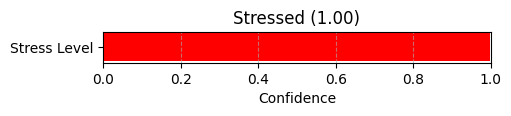

💡 Tip: Take short breaks, prioritize tasks, and seek help if needed.

📝 Text: I’ve been constantly thinking about whether I made the right choices in my career lately.
📌 Prediction: Stressed (1.00)


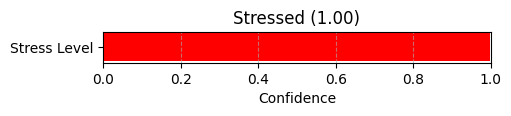

💡 Tip: Try breathing exercises, and focus on things you can control.

📝 Text: Laughed with friends tonight, but as soon as I got home, the silence felt suffocating.
📌 Prediction: Not Stressed (1.00)

📝 Text: Some days I feel like I’m just going through the motions, not really present.
📌 Prediction: Stressed (0.97)


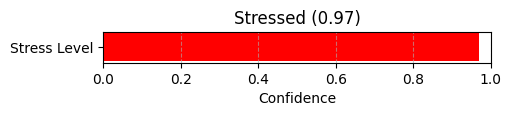

💡 Tip: Take short breaks, prioritize tasks, and seek help if needed.

📝 Text: I’ve started avoiding certain conversations because I know they’ll make my heart race.
📌 Prediction: Stressed (1.00)


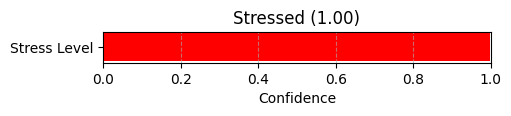

💡 Tip: Take short breaks, prioritize tasks, and seek help if needed.


In [ ]:
# Ensure matplotlib is imported for plotting
import matplotlib.pyplot as plt
import re # Ensure re is imported for regex operations

for text in sample_texts:
    result = classifier(text)[0]
    label = result['label']
    score = result['score']
    label_name = "Stressed" if label == "LABEL_1" else "Not Stressed"

    # Pass the stress_keywords list to the highlight_text function
    highlighted_text = highlight_text(text, stress_keywords)
    print(f"\n📝 Text: {highlighted_text}\n📌 Prediction: {label_name} ({score:.2f})")

    if label_name == "Stressed":
        # Call the show_stress_bar function here
        show_stress_bar(score, label_name)

        category = detect_category_wordnet(text)
        if category:
            tip = category_recommendations.get(category)
            if tip:
                print(tip)
        else:
            # Default recommendation
            print("💡 Tip: Try taking a deep breath, going for a walk, or talking to someone you trust.")